In [100]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
A = np.array([[1, 2, 4, 8], [1, 3, 9, 27], [
             1, 4, 16, 64], [1, 5, 25, 125]], dtype=float)
A

array([[  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [3]:
def elim(A, r, c):
    B = np.outer(A[r, :], A[:, c])/A[r, c]
    return B, A-B

In [4]:
elim(A, 0, 1)

(array([[ 1. ,  1.5,  2. ,  2.5],
        [ 2. ,  3. ,  4. ,  5. ],
        [ 4. ,  6. ,  8. , 10. ],
        [ 8. , 12. , 16. , 20. ]]),
 array([[  0. ,   0.5,   2. ,   5.5],
        [ -1. ,   0. ,   5. ,  22. ],
        [ -3. ,  -2. ,   8. ,  54. ],
        [ -7. ,  -7. ,   9. , 105. ]]))

In [5]:
def brute_elimination(A):
    n = A.shape[0]

    for i in range(n):
        # eliminate
        u, v, a = A[i+1:, i], A[i, i+1:], A[i, i]
        B = np.outer(u, v)/a
        A[i+1:, i+1:] -= B

        # cleanup
        A[i, i+1:] = 0
        A[i+1:, i] = 0

    return A

In [6]:
def find_j(i):
    j, j2 = 0, 1
    while i % (j2*2) == 0:
        j, j2 = j+1, j2*2
    return j, j2


def update(r1, r2, c1, c2, acc):
    '''
    ret: (r2-r1+1) x (c2-c1+1) matrix
    '''
    k = len(acc)
    # print("UPDATE", acc)

    U = np.ndarray((r2-r1+1, k))
    V = np.ndarray((k, c2-c1+1))
    for i, (u, v, a) in enumerate(acc):
        U[:, i] = u[r1:r2+1]/a
        # print(V[i, :].shape, c1, c2+1, v)
        V[i, :] = v[c1:c2+1]

    return np.matmul(U, V)

In [7]:
def simple_elimination(A):
    n = A.shape[0]
    lazy = [None for x in range(n)]

    for i in range(n-1):
        j, j2 = find_j(i+1)

        # lazy eliminate
        u, v, a = A[:, i].copy(), A[i, :].copy(), A[i, i]
        lazy[i] = (u, v, a)

        # update
        acc = lazy[max(0, i-j2+1):i+1]

        r1, r2, c1, c2 = i+1, min(i+j2, n-1), i+1, n-1
        B = update(r1, r2, c1, c2, acc)
        A[r1:r2+1, c1:c2+1] -= B

        r1, r2, c1, c2 = i+j2+1, n-1, i+1, min(i+j2, n-1)
        if r1 < n:
            B = update(r1, r2, c1, c2, acc)
            A[r1:r2+1, c1:c2+1] -= B

        # cleanup
        A[i, i+1:] = 0.0
        A[i+1:, i] = 0.0

    return A

In [8]:
def complex_brute_elimination(A):
    n = A.shape[0]
    lazy = [None for x in range(n)]

    rows = [*range(n)]
    # random.shuffle(rows)

    for r, c in zip(rows, range(n)):
        j, j2 = find_j(c+1)

        # lazy eliminate
        Arc = A[r, c]
        lazy[c] = (A[:, c].copy(), Arc)

        # update
        for i in range(c-j2+1, c+1):
            v, u, a = A[i, c+1:c+j2+1], *lazy[i]
            B = np.outer(u, v)/a
            A[:, c+1:c+j2+1] -= B

        A[:, c] = 0.0
        A[r, c] = Arc

    return A

In [9]:
def complex_elimination(A):
    n = A.shape[0]
    lazy = [None for x in range(n)]

    rows = [*range(n)]
    # random.shuffle(rows)

    for r, c in zip(rows, range(n)):
        j, j2 = find_j(c+1)

        # lazy eliminate
        Arc = A[r, c]
        lazy[c] = (A[:, c].copy(), Arc)

        # lazy update
        super_lazy = [None for x in range(j2)]
        for i in range(j2):
            l, l2 = find_j(i+1)

            # lazy eliminate
            v, u, a = A[c-j2+1+i, :].copy(), *lazy[c-j2+1+i]
            acc = super_lazy[max(0, i-l2+1):i]+[(u,v,a)]

            # update
            r1, r2, c1, c2 = 0, n-1, c+1, min(c+j2, n-1)
            B = update(r1, r2, c1, c2, acc)
            A[r1:r2+1, c1:c2+1] -= B
            
            v, u, a = A[c-j2+1+i, :].copy(), *lazy[c-j2+1+i]
            super_lazy[i] = (u, v, a)

        A[:, c] = 0.0
        A[r, c] = Arc

    return A

In [10]:
complex_elimination(A.copy())

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 6.]])

In [11]:
complex_brute_elimination(A.copy())

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 6.]])

In [12]:
simple_elimination(A.copy())

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 6.]])

In [13]:
brute_elimination(A.copy())

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 6.]])

In [89]:
N=1000

m=[]
for x in range(N):
    if (10*x)%N == 0:
        print(f"{(100*x)//N+10}%")
    A=np.random.rand(1000,1000)
    B = brute_elimination(A.copy())
    C = complex_elimination(A.copy())
    # assert np.all(B-C <= 1)
    m += [np.max(B-C)]
print(m)

10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
[np.float64(0.004778781891218387), np.float64(1.0629086318658665e-05), np.float64(5.0483957295455184e-05), np.float64(0.1117538165563019), np.float64(0.007875738287111744), np.float64(9.098329428525176e-06), np.float64(3.7503485145862214e-05), np.float64(0.0014884015431562148), np.float64(7.374202795062956e-07), np.float64(3.368011141446914e-05), np.float64(0.00017896416829898953), np.float64(6.778328133805189e-05), np.float64(0.0006884191170684062), np.float64(0.0005091954653835273), np.float64(1.9919746591767762e-05), np.float64(0.00012168183684480027), np.float64(1.8838322830561083e-06), np.float64(0.00011600301149883308), np.float64(0.00011331756377330748), np.float64(1.5921648355288198e-06), np.float64(2.272744154652173e-05), np.float64(0.00016219343524426222), np.float64(2.3268466975423507e-06), np.float64(2.0142545054113725e-07), np.float64(8.66282732658874e-07), np.float64(0.0004789999620697927), np.float64(3.22436353599187e-05), np.floa

In [79]:
x = np.where(B-C > 1e-1)
B[x]-C[x]

array([0.35859698])

In [76]:
B[x], C[x]

(array([3437017.01465212]), array([3437007.74897516]))

In [115]:
np.savetxt("error.csv", np.array(m), delimiter=",")

<Axes: >

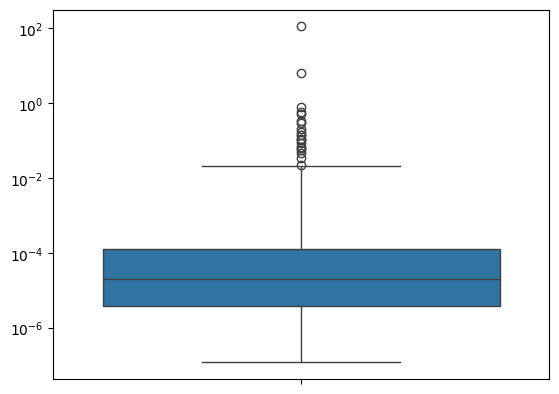

In [114]:
sns.boxplot(np.array(m), log_scale=True)